In [1]:
import sys
from pathlib import Path

# Ubicación del notebook
NOTEBOOK_DIR = Path.cwd()

# Raíz del proyecto = subir un nivel desde Notebooks/
PROJECT_ROOT = NOTEBOOK_DIR.parent

# Añadir raíz del proyecto al sys.path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Proyecto raíz detectado:", PROJECT_ROOT)

Proyecto raíz detectado: c:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils.paths import DATA_DIR, FIG_DIR
from utils.loader import load_csv, save_csv
from utils.cleaning import normalize_market_timeseries

CLEAN_FIG_DIR = FIG_DIR / "clean_figures"
CLEAN_FIG_DIR.mkdir(parents=True, exist_ok=True)

print("📁 Clean fig dir", CLEAN_FIG_DIR)
END_DATE   = "2025-09-05"


📁 Clean fig dir C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\clean_figures


In [6]:
#Cargar datos crudos
df_raw = load_csv(DATA_DIR / "raw_market_data.csv")

#Ejecutamos el pipeline de limpieza y normalización
market_df_clean,meta = normalize_market_timeseries(df_raw, END_DATE, strict=True)

#imprimir algunas filas para verificar
print(market_df_clean.head())

#Guardar los datos limpios
save_csv(market_df_clean, DATA_DIR / "clean_market_data.csv")

         date   ticker asset_class        close currency
0  2017-11-09  BTC-USD      Crypto  7143.580078      USD
1  2017-11-10  BTC-USD      Crypto  6618.140137      USD
2  2017-11-13  BTC-USD      Crypto  6559.490234      USD
3  2017-11-14  BTC-USD      Crypto  6635.750000      USD
4  2017-11-15  BTC-USD      Crypto  7315.540039      USD
Archivo guardado en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\data\clean_market_data.csv


In [7]:
"""
Sanity check: Cobertura temporal por ticker

El objetivo de este bloque es verificar que la limpieza de datos
mediante cleaning.py fue correcta para cada activo.

1. Agrupamos por 'ticker'.
2. Calculamos:
  - first_date: primera fecha disponible en la serie.
  - last_date : última fecha disponible.
  - n_rows    : cantidad total de observaciones (filas).
  - n_missing : cantidad de valores nulos en 'close'.
  - mean      : promedio de los valores 'close'.
  - var       : varianza de los valores 'close'.  
  - std       : desviación estándar de los valores 'close'.
  - asset_class: clase de activo (ej. 'crypto', 'stock', etc.).
  - currency   : moneda en la que está denominado el activo.
3. Ordenamos los resultados por ticker para facilitar la inspección.

Este chequeo es importante porque:
  - Nos permite verificar que la limpieza de datos se realizó correctamente.
    - Identificamos posibles problemas o inconsistencias en los datos.
    - Nos da una visión general de la cobertura temporal y calidad de los datos
        para cada activo.

"""


summary_clean = (
    market_df_clean.groupby("ticker")
    .agg(
        first_date=("date", "min"),
        last_date=("date", "max"),
        n_rows=("close", "count"),
        n_missing=("close", lambda s: s.isna().sum()),
        mean=("close", "mean"),
        var=("close", "var"),
        std=("close", "std"),
        asset_class=("asset_class", "first"),
        currency=("currency", "first"),
    )
    .reset_index()
)

summary_clean.to_csv(DATA_DIR / "clean_market_summary.csv", index=False)
summary_clean.style.background_gradient(cmap="Blues")
display(summary_clean)

,ticker,first_date,last_date,n_rows,n_missing,mean,var,std,asset_class,currency
0,BTC-USD,2017-11-09,2025-09-04,1931,0,34100.146852,8.748030e+08,29577.069272,Crypto,USD
1,EUNL.DE,2017-11-09,2025-09-04,1931,0,68.826128,3.340429e+02,18.276842,ETF,EUR
2,QQQ,2017-11-09,2025-09-04,1931,0,307.956964,1.381476e+04,117.536217,ETF,USD
3,TSLA,2017-11-09,2025-09-04,1931,0,169.809921,1.384387e+04,117.659960,Stock,USD
4,V,2017-11-09,2025-09-04,1931,0,210.209250,3.825701e+03,61.852253,Stock,USD
5,VOO,2017-11-09,2025-09-04,1931,0,349.620733,1.105707e+04,105.152618,ETF,USD
6,XAR,2017-11-09,2025-09-04,1931,0,114.833072,9.342423e+02,30.565378,ETF,USD
7,XRP-USD,2017-11-09,2025-09-04,1931,0,0.720082,4.460942e-01,0.667903,Crypto,USD


In [8]:
"""
Agrupación en base al ticker (para visualización)
"""
for ticker, group in market_df_clean.groupby('ticker'):
    print(f"Ticker: {ticker}")
    print(group.head(10))
    print("\n" + "="*50 + "\n") # Separador para una mejor visualización

Ticker: BTC-USD
         date   ticker asset_class        close currency
0  2017-11-09  BTC-USD      Crypto  7143.580078      USD
1  2017-11-10  BTC-USD      Crypto  6618.140137      USD
2  2017-11-13  BTC-USD      Crypto  6559.490234      USD
3  2017-11-14  BTC-USD      Crypto  6635.750000      USD
4  2017-11-15  BTC-USD      Crypto  7315.540039      USD
5  2017-11-16  BTC-USD      Crypto  7871.689941      USD
6  2017-11-17  BTC-USD      Crypto  7708.990234      USD
7  2017-11-20  BTC-USD      Crypto  8200.639648      USD
8  2017-11-21  BTC-USD      Crypto  8071.259766      USD
9  2017-11-22  BTC-USD      Crypto  8253.549805      USD


Ticker: EUNL.DE
            date   ticker asset_class      close currency
1931  2017-11-09  EUNL.DE         ETF  44.970001      EUR
1932  2017-11-10  EUNL.DE         ETF  44.880001      EUR
1933  2017-11-13  EUNL.DE         ETF  44.820000      EUR
1934  2017-11-14  EUNL.DE         ETF  44.310001      EUR
1935  2017-11-15  EUNL.DE         ETF  44.080002 

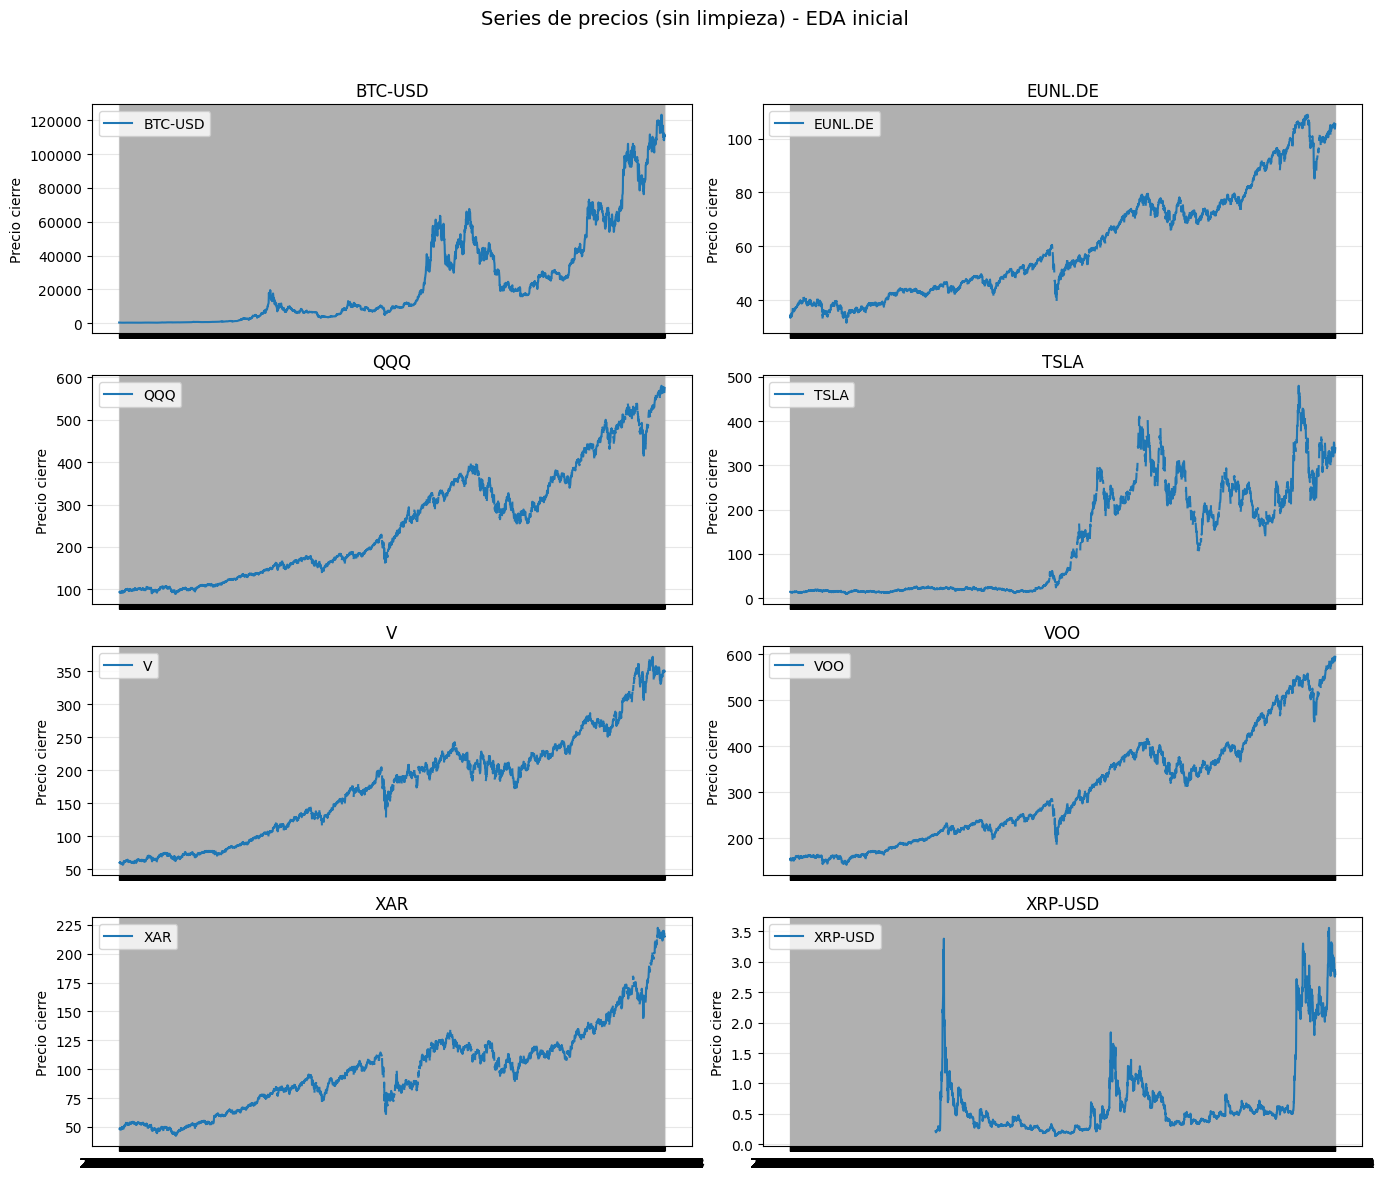

In [ ]:
def plot_subplots(df: pd.DataFrame):
    """
    Genera subplots de series de precios (sin limpieza previa) para cada ticker
    contenido en un DataFrame en formato tidy.

    Propósito
    ---------
    - Visualizar de forma rápida la evolución de precios de cierre ajustados
      para todos los tickers disponibles en el dataset.
    - Explorar tendencias, volatilidad y posibles anomalías antes de la fase
      de limpieza y normalización.
    - Ofrecer una visión comparativa mediante subplots ordenados en cuadrícula.

    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame en formato tidy con las columnas mínimas:
        - 'date'   : fecha (datetime.date)
        - 'ticker' : símbolo del activo
        - 'close'  : precio de cierre ajustado

    Notas
    -----
    - El número de filas en la cuadrícula de subplots se calcula dinámicamente
      en función del número total de tickers.
    - Se crean siempre 2 columnas de gráficos para mejor legibilidad.
    - Si el número de tickers es impar, los ejes sobrantes se eliminan.
    - Cada subplot incluye título con el ticker, leyenda y grilla ligera.
    - El gráfico general incluye un título común a todos los subplots.

    Ejemplos
    --------
    >>> plot_subplots(market_df)
    # Devuelve una cuadrícula de gráficos con la serie de precios por ticker.
    """
    tickers = df["ticker"].unique()
    n = len(tickers)

    # Definimos tamaño de figura (filas dinámicas, 2 columnas)
    ncols = 2
    nrows = (n + 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols,
                             figsize=(14, 3 * nrows), sharex=True)

    # Aplanamos ejes para iterar fácilmente
    axes = axes.flatten()

    # Iteramos sobre cada ticker y generamos la serie
    for i, tk in enumerate(tickers):
        subset = df[df["ticker"] == tk]
        axes[i].plot(subset["date"], subset["close"], label=tk, color="tab:blue")
        axes[i].set_title(f"{tk}", fontsize=12)
        axes[i].set_ylabel("Precio cierre")
        axes[i].grid(True, alpha=0.3)
        axes[i].legend()

    # Quitamos ejes sobrantes si el número de tickers es impar
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Título general y ajuste de espaciado
    plt.suptitle("Series de precios (sin limpieza) - EDA inicial", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_subplots(market_df_clean)

In [9]:
tickers = market_df_clean["ticker"].unique()

for tk in tickers:
    fig, ax = plt.subplots(figsize=(12,4))

    sub = market_df_clean[market_df_clean["ticker"] == tk]
    ax.plot(sub["date"], sub["close"], label=tk, color="cyan")

    ax.set_title(f"Serie de precios crudos — {tk}")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Precio")
    ax.grid(True, alpha=0.3)
    ax.legend()

    fig.savefig(CLEAN_FIG_DIR / f"{tk}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

print("📈 Gráficas individuales guardadas en:", CLEAN_FIG_DIR)


📈 Gráficas individuales guardadas en: C:\Users\cathe\Didier Jesus\EduFinance\EduFinance_Simulator\figures\clean_figures


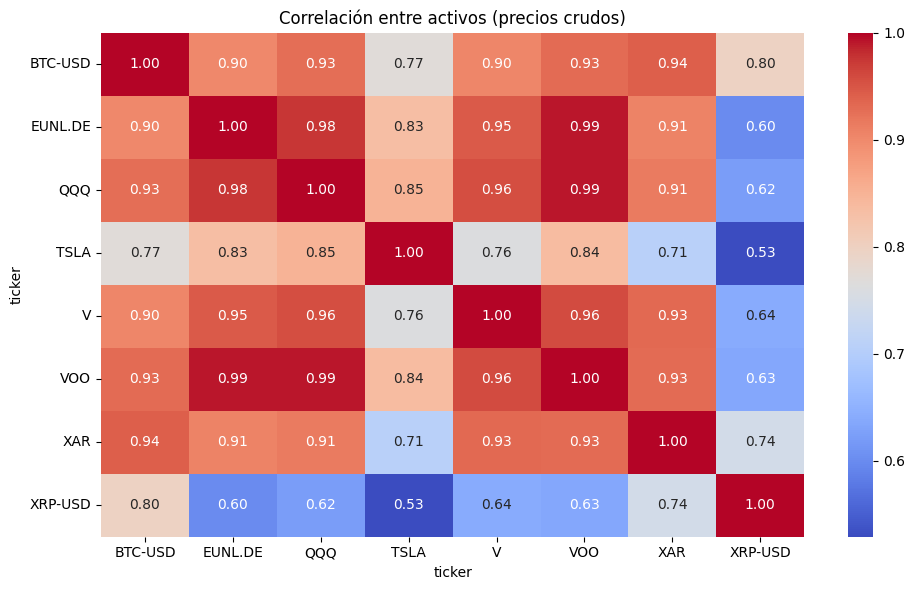

In [11]:
wide_prices = market_df_clean.pivot(index="date", columns="ticker", values="close")
corr_prices = wide_prices.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_prices, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlación entre activos (precios crudos)")

plt.tight_layout()
plt.savefig(CLEAN_FIG_DIR / "clean_heatmap_prices.png", dpi=300)
plt.show()